In [2]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df_adalab = pd.read_csv('data/df_adalab.csv', index_col = 'index')
df_adalab.drop('Unnamed: 0', axis = 1, inplace = True)
df_adalab.head(2)

,time,age,gender,country,education,role,coding_experience,field,salary,share_plotlydash,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_None,media_OTHER
index,,,,,,,,,,,,,,,,,,,,,
0,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Manufacturing/Fabrication,"25,000-29,999",NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...","Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
1,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,Manufacturing/Fabrication,"60,000-69,999",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN


In [4]:
#miramos los valores nulos de nuestros datos
df_adalab.loc[:,:'salary'].isnull().sum()

time                     0
age                      0
gender                   0
country                  0
education                0
role                     0
coding_experience        0
field                 9648
salary               10582
dtype: int64

In [5]:
#miramos cuantas filas tenemos en total
df_adalab.shape

(25973, 43)

In [6]:
#miramos cuantas profesiones tenemos y cuántos registros de cada profesion
df_adalab['role'].value_counts()

role
Student                         6804
Data Scientist                  3616
Software Engineer               2449
Other                           2393
Data Analyst                    2301
Currently not employed          1986
Research Scientist              1538
Machine Learning Engineer       1499
Business Analyst                 968
Program/Project Manager          849
Data Engineer                    668
Product Manager                  319
Statistician                     313
DBA/Database Engineer            171
Developer Relations/Advocacy      99
Name: count, dtype: int64

In [7]:
#posible filtrado para analisis posteriores de nuestros datos:
#student, data analyst, other, currently not employed, 

In [8]:
df_da = df_adalab[df_adalab['role'] == 'Data Analyst']
df_da

,time,age,gender,country,education,role,coding_experience,field,salary,share_plotlydash,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_None,media_OTHER
index,,,,,,,,,,,,,,,,,,,,,
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,"2,000-2,999",NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
32,171,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,Manufacturing/Fabrication,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,744,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Non-profit/Service,"7,500-9,999",NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
46,1524,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Computers/Technology,$0-999,NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,NaN,NaN,NaN,NaN,NaN
52,866,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,Manufacturing/Fabrication,"25,000-29,999",NaN,...,NaN,NaN,"Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,"Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25954,474,25-29,Man,India,Professional doctorate,Data Analyst,< 1 years,Online Service/Internet-based Services,$0-999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25959,96354,18-21,Man,India,Bachelor’s degree,Data Analyst,1-3 years,Academics/Education,$0-999,NaN,...,NaN,NaN,"Course Forums (forums.fast.ai, Coursera forums...","YouTube (Kaggle YouTube, Cloud AI Adventures, ...",NaN,"Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...","Slack Communities (ods.ai, kagglenoobs, etc)",NaN,NaN
25965,40250,18-21,Man,India,Master’s degree,Data Analyst,1-3 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df_da.to_csv('data/df_da.csv')

In [10]:
df_da.isnull().sum()

time                              0
age                               0
gender                            0
country                           0
education                         0
role                              0
coding_experience                 0
field                           114
salary                          262
share_plotlydash               2266
share_streamlit                2252
share_NBViewer                 2278
share_GitHub                   1739
share_Personal blog            2208
share_Kaggle                   1863
share_Colab                    2104
share_Shiny                    2251
share_None                     1884
share_OTHER                    2253
courses_Coursera               1409
courses_edX                    1993
courses_Kaggle                 1483
courses_DataCamp               1758
courses_Fastai                 2241
courses_Udacity                2032
courses_Udemy                  1587
courses_LinkedIn               1934
courses_Cloud-certification 

In [11]:
df_da_filtrado = df_da.loc[:,'age':'salary']
df_da_filtrado.head()

,age,gender,country,education,role,coding_experience,field,salary
index,,,,,,,,
16,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,"2,000-2,999"
32,22-24,Nonbinary,United States of America,Some college/university study without earning ...,Data Analyst,< 1 years,Manufacturing/Fabrication,NaN
33,30-34,Woman,Egypt,Bachelor’s degree,Data Analyst,3-5 years,Non-profit/Service,"7,500-9,999"
46,22-24,Man,China,Some college/university study without earning ...,Data Analyst,< 1 years,Computers/Technology,$0-999
52,40-44,Man,South Africa,Master’s degree,Data Analyst,1-3 years,Manufacturing/Fabrication,"25,000-29,999"


In [14]:
european_countries = ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", "Vatican City"]

In [18]:
df_da_europa = df_da[df_da['country'].isin(european_countries)]
df_da_europa.head()

,time,age,gender,country,education,role,coding_experience,field,salary,share_plotlydash,...,media_Reddit,media_Kaggle,media_Forums,media_YouTube,media_Podcasts,media_Blogs,media_Journal,media_Slack,media_None,media_OTHER
index,,,,,,,,,,,,,,,,,,,,,
16,1315,50-54,Man,Belgium,Bachelor’s degree,Data Analyst,20+ years,Energy/Mining,"2,000-2,999",NaN,...,NaN,"Kaggle (notebooks, forums, etc)",NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
247,497,22-24,Man,Ukraine,Doctoral degree,Data Analyst,3-5 years,Other,$0-999,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,429,25-29,Woman,Italy,Master’s degree,Data Analyst,1-3 years,Academics/Education,"1,000-1,999",NaN,...,"Reddit (r/machinelearning, etc)",NaN,NaN,NaN,"Podcasts (Chai Time Data Science, O’Reilly Dat...","Blogs (Towards Data Science, Analytics Vidhya,...","Journal Publications (peer-reviewed journals, ...",NaN,NaN,NaN
396,856,50-54,Man,Spain,Bachelor’s degree,Data Analyst,1-3 years,Online Service/Internet-based Services,"60,000-69,999",NaN,...,NaN,NaN,NaN,NaN,NaN,"Blogs (Towards Data Science, Analytics Vidhya,...",NaN,NaN,NaN,NaN
578,208,22-24,Man,Ukraine,Bachelor’s degree,Data Analyst,< 1 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


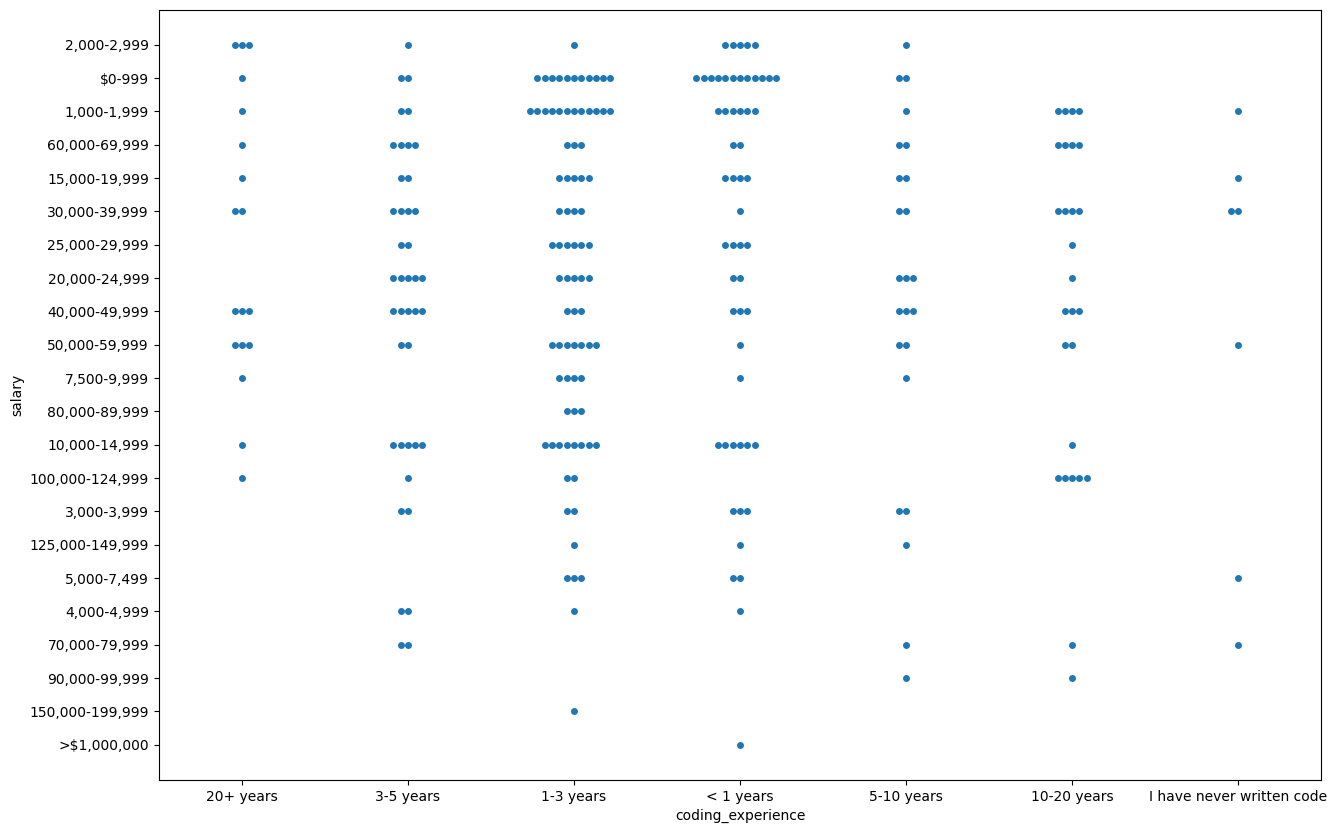

In [20]:
plt.figure(figsize = (15,10))

fig = sns.swarmplot(x = 'coding_experience', y = 'salary', data = df_da_europa);